In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
#Loading the dataset
df = pd.read_excel('horse_kick_data.xlsx')
df.head(15)

,corps,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,total
0,G,0,2,2,1,0,0,1,1,0,3,0,2,1,0,0,1,0,1,0,1,16
1,I,0,0,0,2,0,3,0,2,0,0,0,1,1,1,0,2,0,3,1,0,16
2,II,0,0,0,2,0,2,0,0,1,1,0,0,2,1,1,0,0,2,0,0,12
3,III,0,0,0,1,1,1,2,0,2,0,0,0,1,0,1,2,1,0,0,0,12
4,IV,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,8
5,V,0,0,0,0,2,1,0,0,1,0,0,1,0,1,1,1,1,1,1,0,11
6,VI,0,0,1,0,2,0,0,1,2,0,1,1,3,1,1,1,0,3,0,0,17
7,VII,1,0,1,0,0,0,1,0,1,1,0,0,2,0,0,2,1,0,2,0,12
8,VIII,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,7
9,IX,0,0,0,0,0,2,1,1,1,0,2,1,1,0,1,2,0,1,0,0,13


In [3]:
#Processing the data
df.drop(columns = ['corps', 'total'], inplace = True)
df.drop(index = 14, inplace = True)
df.head()

,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894
0,0,2,2,1,0,0,1,1,0,3,0,2,1,0,0,1,0,1,0,1
1,0,0,0,2,0,3,0,2,0,0,0,1,1,1,0,2,0,3,1,0
2,0,0,0,2,0,2,0,0,1,1,0,0,2,1,1,0,0,2,0,0
3,0,0,0,1,1,1,2,0,2,0,0,0,1,0,1,2,1,0,0,0
4,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0


In [4]:
#X is the database in numpy.
X = df.values

train_set = X[:, :13]               #Dividing the dataset into training set compraising of first 13 years
test_set = X[:, 13:]                #Dividing the dataset into testing set compraising of last 7 years

print(train_set.shape)
print(test_set.shape)

(14, 13)
(14, 7)


### MLE Estimation

The learnt parametes are as follows:
[[1.        ]
 [0.69230769]
 [0.61538462]
 [0.61538462]
 [0.46153846]
 [0.38461538]
 [0.84615385]
 [0.53846154]
 [0.30769231]
 [0.69230769]
 [0.53846154]
 [1.        ]
 [1.46153846]
 [0.30769231]]
The RMSE error of the prediction for each corps are as follows:
[[0.75592895]
 [1.11244402]
 [0.72975638]
 [0.72975638]
 [0.48476363]
 [0.58798911]
 [0.98980432]
 [0.89801133]
 [0.50942097]
 [0.73839285]
 [1.15969215]
 [1.13389342]
 [1.02380789]
 [0.94121376]]


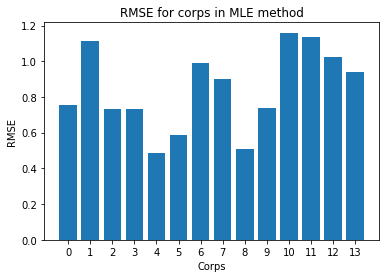

In [5]:
#MLE

#finding lamda_cap using the MLE estimation
lamda_cap = np.sum(train_set, axis = 1)/float(train_set.shape[1])            
lamda_cap.shape = (train_set.shape[0],1)

#Calculating the Root mean sqrare error on the predictions(lamda_cap) for the test set
error = np.sqrt(np.sum((test_set-lamda_cap)**2, axis = 1)/float(test_set.shape[1]))
error.shape = (test_set.shape[0],1)

print('The learnt parametes are as follows:')
print(lamda_cap)
print('The RMSE error of the prediction for each corps are as follows:')
print(error)


plt.bar(np.arange(14), error.flatten())
plt.title("RMSE for corps in MLE method")
plt.xlabel("Corps")
plt.ylabel("RMSE")
plt.xticks(np.arange(14), np.arange(14))

plt.show()

### MAP Estimation

The learnt parametes are as follows:
[[0.95652174]
 [0.7826087 ]
 [0.73913043]
 [0.73913043]
 [0.65217391]
 [0.60869565]
 [0.86956522]
 [0.69565217]
 [0.56521739]
 [0.7826087 ]
 [0.69565217]
 [0.95652174]
 [1.2173913 ]
 [0.56521739]]
The RMSE error of the prediction for each corps are as follows:
[[0.72362248]
 [1.09092443]
 [0.74748656]
 [0.74748656]
 [0.58169949]
 [0.42915614]
 [0.98982127]
 [0.88082769]
 [0.51339077]
 [0.75842553]
 [1.08608661]
 [1.16177298]
 [0.86192294]
 [0.90352925]]


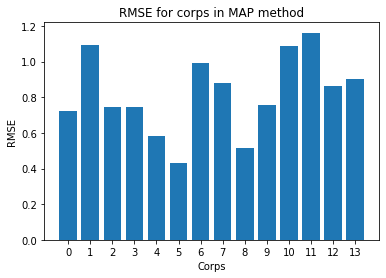

In [6]:
#MAP
k = np.sum(train_set, axis = 1)     #Total deaths in each respective corps
N = train_set.shape[1]              
alpha = 10
beta = 10

#finding lamda_cap using the MAP estimation
lamda_cap = (alpha-1+k)/float(beta+N)
lamda_cap.shape = (train_set.shape[0],1)

#Calculating the Root mean sqrare error on the predictions(lamda_cap) for the test set
error = np.sqrt(np.sum((test_set-lamda_cap)**2, axis = 1)/float(test_set.shape[1]))
error.shape = (test_set.shape[0],1)

print('The learnt parametes are as follows:')
print(lamda_cap)
print('The RMSE error of the prediction for each corps are as follows:')
print(error)

plt.bar(np.arange(14), error.flatten())
plt.title("RMSE for corps in MAP method")
plt.xlabel("Corps")
plt.ylabel("RMSE")
plt.xticks(np.arange(14), np.arange(14))

plt.show()

### PLOTS 

In [7]:
x = np.linspace(0, 5, 1000)

def plots(alpha, beta, x, N, k, i):
    #function to return the values of prior, likelihood, posteriror for all x 
    prior = (beta**alpha)/math.gamma(alpha)*x**(alpha-1)*np.exp(-1*beta*x)

    den = 1
    for j in range(train_set.shape[1]):
        den = den*np.math.factorial(train_set[i,j])
    likelihood = np.exp(-1*N*x)*(x**k[i])
    likelihood = likelihood/den

    posterior = prior * likelihood

    return prior, likelihood, posterior

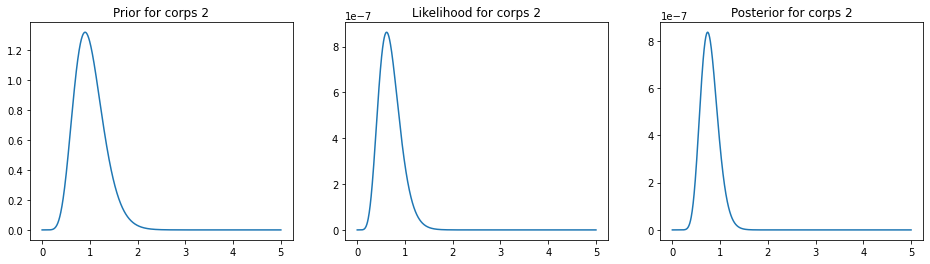

Likelihood maximises at: 0.615616
Posterior maximises at: 0.740741


In [8]:
#Plots for corps 2
fig,ax = plt.subplots(1,3,figsize=(16,4))
ax = ax.flatten()

y = plots(alpha, beta, x, N, k, 2)

ax[0].plot(x, y[0])
ax[0].set_title("Prior for corps 2")
ax[1].plot(x, y[1])
ax[1].set_title("Likelihood for corps 2")
ax[2].plot(x, y[2])
ax[2].set_title("Posterior for corps 2")

plt.show()

#MLE ESTIMATE
x_max=np.argmax(y[1])                 
print('Likelihood maximises at: %f' %(x[x_max]))
#MAP ESTIMATE
x_max=np.argmax(y[2])
print('Posterior maximises at: %f' %(x[x_max]))

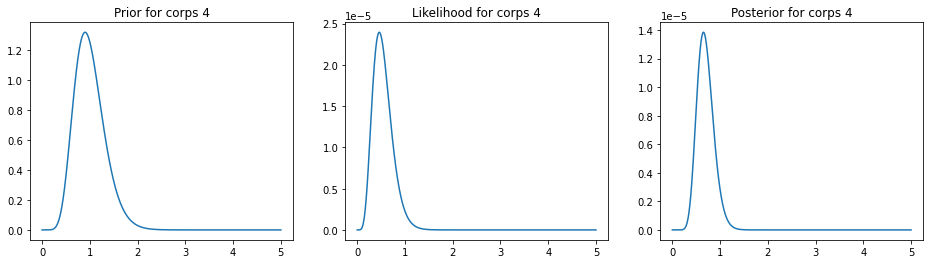

Likelihood maximises at: 0.460460
Posterior maximises at: 0.650651


In [9]:
#Plots for corps 4 
fig,ax = plt.subplots(1,3,figsize=(16,4))
ax = ax.flatten()

y = plots(alpha, beta, x, N, k, 4)

ax[0].plot(x, y[0])  
ax[0].set_title("Prior for corps 4")
ax[1].plot(x, y[1])
ax[1].set_title("Likelihood for corps 4")
ax[2].plot(x, y[2])
ax[2].set_title("Posterior for corps 4")

plt.show()

#MLE ESTIMATE
x_max=np.argmax(y[1])                 
print('Likelihood maximises at: %f' %(x[x_max]))
#MAP ESTIMATE
x_max=np.argmax(y[2])
print('Posterior maximises at: %f' %(x[x_max]))

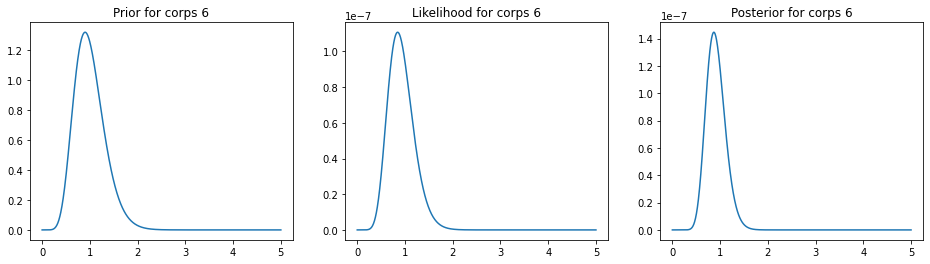

Likelihood maximises at: 0.845846
Posterior maximises at: 0.870871


In [10]:
#Plots for corps 6 
fig,ax = plt.subplots(1,3,figsize=(16,4))
ax = ax.flatten()

y = plots(alpha, beta, x, N, k, 6)

ax[0].plot(x, y[0])  
ax[0].set_title("Prior for corps 6")
ax[1].plot(x, y[1])
ax[1].set_title("Likelihood for corps 6")
ax[2].plot(x, y[2])
ax[2].set_title("Posterior for corps 6")

plt.show()

#MLE ESTIMATE
x_max=np.argmax(y[1])                 
print('Likelihood maximises at: %f' %(x[x_max]))
#MAP ESTIMATE
x_max=np.argmax(y[2])
print('Posterior maximises at: %f' %(x[x_max]))